In [48]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
df = pd.read_csv("/content/Client.csv",index_col=0)
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038


# ***EDA***

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.8 KB


In [51]:
df.drop(["CASENUM"],inplace=True,axis=1)

In [52]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,NaN,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [53]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [54]:
df["CLMAGE"].fillna(df["CLMAGE"].mean(),inplace=True)

In [55]:
df.isnull().sum()

ATTORNEY     0
CLMSEX      12
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
dtype: int64

Missing Value ***Imputation***

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
si = SimpleImputer(strategy="most_frequent")

In [58]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [59]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# *Splitting The Data Into TRaining And Testing*

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.000000,34.940
1,0,1.0,0.0,0.0,18.000000,0.891
2,0,0.0,1.0,0.0,5.000000,0.330
3,1,0.0,1.0,1.0,31.000000,0.037
4,0,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,28.414422,0.576
1336,1,1.0,1.0,0.0,46.000000,3.705
1337,0,1.0,1.0,0.0,39.000000,0.099
1338,1,1.0,0.0,0.0,8.000000,3.177


In [62]:
x = df.iloc[:,1:]
y = df["ATTORNEY"]

In [63]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [64]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)
 

In [66]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.000000,0.935
969,0.0,1.0,0.0,14.000000,10.869
594,1.0,1.0,0.0,43.000000,0.007
1081,1.0,1.0,0.0,77.000000,1.000
1053,1.0,1.0,0.0,58.000000,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.000000,6.979
905,0.0,1.0,0.0,28.414422,3.330
1096,0.0,1.0,0.0,50.000000,3.095
235,1.0,1.0,0.0,17.000000,1.619


Model ***Building***

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lg = LogisticRegression()

In [69]:
#Train the model
lg.fit(xtrain,ytrain)

#predictions
ypred = lg.predict(xtest)

In [70]:
len(xtest)

335

In [71]:
len(ypred)

335

# *Model Evaluation*

In [72]:
print("Actual Y :",ytest[:25].values)
print("Predicted Y :",ypred[:25])

Actual Y : [0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
Predicted Y : [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       169
           1       0.71      0.57      0.64       166

    accuracy                           0.67       335
   macro avg       0.68      0.67      0.67       335
weighted avg       0.68      0.67      0.67       335



In [78]:
confusion_matrix(ytest,ypred)

array([[131,  38],
       [ 71,  95]])

Text(50.722222222222214, 0.5, 'Predicted Values')

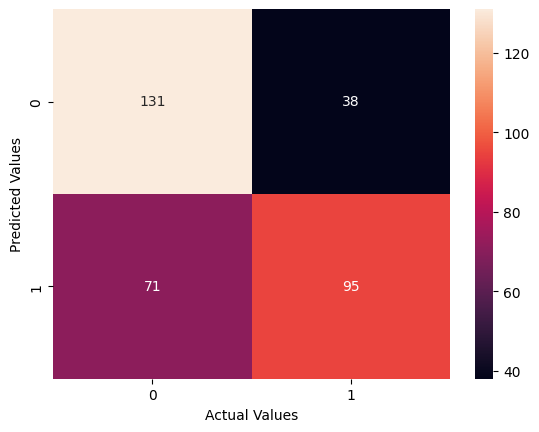

In [83]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt="g")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#fmt ="g" is used for converting scintific notation into normal

In [85]:
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


# Threshold ***selection***

In [89]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.30452531, 0.31877703, 0.44367414, 0.38921733, 0.59269384,
       0.36956317, 0.30038704, 0.54692511, 0.33818035, 0.33127783,
       0.44228109, 0.38675009, 0.39055992, 0.59112026, 0.33552674,
       0.57245686, 0.43372324, 0.45788059, 0.35447774, 0.33139277,
       0.31723268, 0.40883429, 0.62290217, 0.41041013, 0.40151401,
       0.36355281, 0.29759251, 0.37764075, 0.39961214, 0.32114247,
       0.40983596, 0.3643934 , 0.44023927, 0.73202738, 0.75057933,
       0.39110034, 0.64453762, 0.54259562, 0.35093269, 0.30951188,
       0.32152608, 0.99986938, 0.49897881, 0.47033417, 0.43391175,
       0.60194141, 0.27722799, 0.32353764, 0.37622974, 0.41463054,
       0.42522759, 0.32120318, 0.31797751, 0.42228205, 0.45048237,
       0.36964963, 0.73649517, 0.34719582, 0.82840481, 0.34623401,
       0.57875229, 0.63721819, 0.36956317, 0.91182407, 0.59604453,
       0.85704698, 0.3448188 , 0.87716263, 0.53214663, 0.8516612 ,
       0.74748072, 0.65094849, 0.3198435 , 0.41479701, 0.63726

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

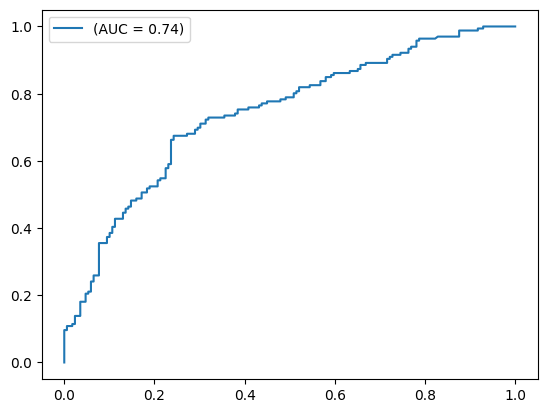

In [92]:
auc = roc_auc_score(ytest,proba)
fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [93]:
auc

0.7413381335994866

In [94]:
threshold

array([2.        , 1.        , 0.90701854, 0.90641378, 0.90159902,
       0.87716263, 0.86023778, 0.85704698, 0.831285  , 0.8173157 ,
       0.76368107, 0.75653791, 0.75057933, 0.74748072, 0.74599478,
       0.74250907, 0.73116688, 0.71678622, 0.69687766, 0.69050359,
       0.64231766, 0.63663173, 0.6288054 , 0.62373652, 0.61941853,
       0.61865162, 0.61336854, 0.60880523, 0.59789666, 0.59492775,
       0.59112026, 0.58991005, 0.58878439, 0.58722189, 0.58623377,
       0.58555852, 0.57358614, 0.57244381, 0.57219421, 0.57028814,
       0.5685665 , 0.56035964, 0.5543461 , 0.55137603, 0.54692511,
       0.53860734, 0.53214663, 0.5297742 , 0.52533484, 0.51516316,
       0.49898784, 0.49897881, 0.49254307, 0.49077152, 0.44721729,
       0.44367414, 0.44206802, 0.43741415, 0.43539918, 0.43432415,
       0.43372324, 0.43286316, 0.43164517, 0.42833823, 0.42580737,
       0.42522759, 0.42338761, 0.42236918, 0.42228205, 0.41893198,
       0.41730687, 0.41479701, 0.41463054, 0.41404282, 0.41132

In [95]:
len(threshold)

140

In [97]:
accuracy = []
for i in threshold:
  ypred = nm.where(proba>i,1,0)
  accuracy.append(accuracy_score(ytest,ypred))
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [98]:
final_threshold.sort_values(by="Accuracy",ascending=False)

,Threshold,Accuracy
56,0.442068,0.713433
55,0.443674,0.713433
54,0.447217,0.710448
67,0.422369,0.704478
57,0.437414,0.704478
...,...,...
136,0.299849,0.531343
137,0.299543,0.528358
0,2.000000,0.504478
1,1.000000,0.504478


In [99]:
from sklearn.preprocessing import binarize

In [101]:
y = binarize([proba],threshold=0.442068)[0]
y

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [102]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       169
           1       0.73      0.67      0.70       166

    accuracy                           0.72       335
   macro avg       0.72      0.72      0.72       335
weighted avg       0.72      0.72      0.72       335

